In [34]:
import pandas as pd
import numpy as np
import seaborn as sn
nodes = []
clusters = []
count = 0
with open("../../../data/outputClustersNormalData2_17/part-00000") as f: 
    for line in f:
#         if count > 1000:
#             break
        line = line.strip()[1:-1]
        node, cluster = line.split(",")
        nodes.append(int(node))
        clusters.append(int(cluster))
        
# with open("../../../data/output22/part-00001") as f: 
#     for line in f:
# #         if count > 1000:
# #             break
#         line = line.strip()[1:-1]
#         node, cluster = line.split(",")
#         nodes.append(int(node))
#         clusters.append(int(cluster))

In [35]:
df = pd.DataFrame({'node': nodes,  'cluster': clusters})

In [36]:
df.head()

,node,cluster
0,185012,954892
1,354796,1181827
2,1179224,1181827
3,129434,1400624
4,1377538,1060748


In [37]:
df = df.sort_values('node').reset_index(drop=True)

In [38]:
df['cluster'].value_counts()[:5]

1400624    93532
1181827    41362
1060748    35851
870589     12397
81608      10688
Name: cluster, dtype: int64

In [40]:
# Number of vertices:
len(df['node'].unique())

344877

In [41]:
# Number of clusters:
len(df['cluster'].unique())

22049

In [43]:
clusters_counts = df['cluster'].value_counts()
clusters_counts.describe()

count    22049.000000
mean        15.641390
std        741.338534
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      93532.000000
Name: cluster, dtype: float64

In [44]:
clusters_counts[clusters_counts == 1].shape[0]

13465

In [45]:
clusters_counts[clusters_counts > 1].shape[0]

8584

In [46]:
clusters_counts[clusters_counts > 10].shape[0]

1074

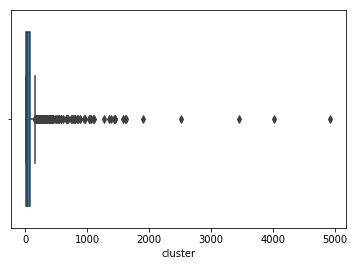

In [47]:
sn.boxplot(clusters_counts[(clusters_counts > 10) & (clusters_counts < 5000)])

# The original graph

In [14]:
orig_graph = pd.read_csv("../../../data/wiki-topcats-short_ver_2.txt", sep=" ", names=['src', 'dsn'])
orig_graph.head()

,src,dsn
0,1,2
1,2,1
2,6,1102234
3,9,10
4,9,1101496


In [19]:
all_nodes = np.unique(np.concatenate([orig_graph['src'].values, orig_graph['dsn'].values]))

In [21]:
all_nodes.shape

(344877,)

In [56]:
sample_clusters = pd.read_csv("../../../../assignment 3/sample_clusters_ver_2.csv")
sample_clusters.head()

,Unnamed: 0,name,nodes
0,466,Category:Greek_Orthodox_Patriarchs_of_Alexandria,"['47091', '47092', '47093', '47094', '47095', ..."
1,8249,Category:Writers_from_New_Jersey,"['55522', '70631', '133117', '134234', '134922..."
2,4535,Category:Fictional_telepaths,"['109860', '109861', '109863', '113225', '1349..."
3,9474,Category:Scottish_clans,"['157608', '185054', '185739', '186016', '1860..."
4,10992,Category:Differential_geometry,"['6', '35580', '63699', '63715', '63718', '698..."


In [57]:
nodes_from_clusters = sample_clusters['nodes'].apply(lambda x : eval(x))
clusters = sample_clusters['name']

In [58]:
nodes = []
labels = []
for nds, cluster in zip(nodes_from_clusters, clusters):
    nodes.extend(nds)
    labels.extend([cluster for i in range(len(nds))])

In [59]:
len(nodes), len(labels)

(457799, 457799)

In [62]:
clusters_counts.index.values.shape

(22049,)

In [66]:
type(df['node'].iloc[0])

numpy.int64

In [69]:
type(node_label['node'].iloc[0])

str

In [72]:
node_label = pd.DataFrame({'node':nodes, 'cluster': labels})
node_label['node'] = node_label['node'].astype(int)
node_label = node_label[node_label['node'].isin(df['node'])]
node_label.head()

,node,cluster
0,47091,Category:Greek_Orthodox_Patriarchs_of_Alexandria
1,47092,Category:Greek_Orthodox_Patriarchs_of_Alexandria
2,47093,Category:Greek_Orthodox_Patriarchs_of_Alexandria
3,47094,Category:Greek_Orthodox_Patriarchs_of_Alexandria
4,47095,Category:Greek_Orthodox_Patriarchs_of_Alexandria


In [73]:
# Number of vertices:
len(node_label['node'].unique())

344877

In [74]:
# Number of clusters:
len(node_label['cluster'].unique())

1698

In [75]:
original_clusters_counts = node_label['cluster'].value_counts()
original_clusters_counts.describe()

count     1698.000000
mean       241.693168
std        585.546038
min          1.000000
25%         98.000000
50%        133.000000
75%        229.750000
max      14651.000000
Name: cluster, dtype: float64

In [77]:
node_label2 = node_label.drop_duplicates(subset=['node'])
node_label2.shape

(344877, 2)

In [78]:
original_clusters_counts2 = node_label2['cluster'].value_counts()
original_clusters_counts2.describe()

count     1697.000000
mean       203.227460
std        503.668531
min          1.000000
25%         84.000000
50%        115.000000
75%        197.000000
max      13331.000000
Name: cluster, dtype: float64

In [79]:
original_clusters_counts2[original_clusters_counts2 == 1].shape[0]

4

In [81]:
original_clusters_counts2[original_clusters_counts2 > 10].shape[0]

1677

# Clusters sizes during iterations

No handles with labels found to put in legend.


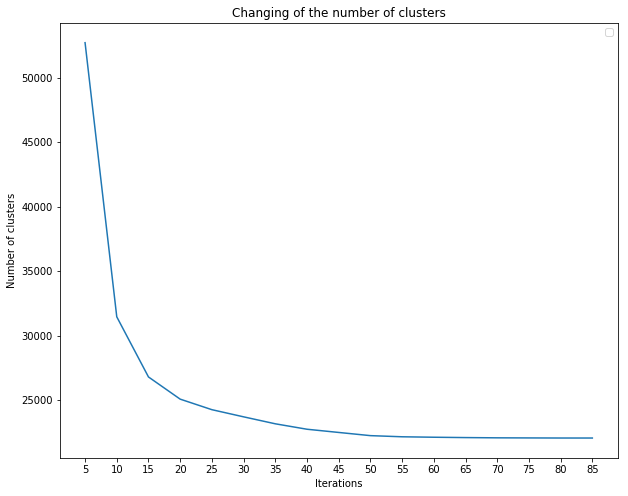

In [120]:
from matplotlib import pyplot as plt

values = [52710,31450,26786,25065,24248,23693,23153,22731,22482,22235,22146,22111,22084,22065,22057,22050,22049]


fig, ax = plt.subplots(figsize=(10,8), )
ax.plot(values)#, label='Model length')
# ax.plot(a, d, 'k:', label='Data length')
# ax.plot(a, c + d, 'k', label='Total message length')
ax.legend()#loc='upper center', shadow=True, fontsize='x-large')
ax.set_title("Changing of the number of clusters")
ax.set_xlabel('Iterations')
ax.set_ylabel('Number of clusters')

plt.xticks([i for i in range(0, len(values))], [i*5  for i in range(1, len(values)+1)])
# plt.yticks([i for i in range(10,0, -1)], ["log({})".format(i)  for i in values])

# ax.set_yticks(np.arange(len(linestyles)), linestyles.keys())

# Put a nicer background color on the legend.
# ax.legend.get_frame().set_facecolor('C0')

plt.show()


# Top 10 biggest clusters analysis

In [87]:
top10 = df['cluster'].value_counts()[:10].index
top10 = df[df['cluster'].isin(top10)]
# df.groupby('a')['b'].apply(list)
top10 = top10.groupby('cluster')['node'].apply(list)
top10

cluster
81608      [1651, 13891, 23516, 26958, 27009, 27055, 2710...
227612     [14453, 33476, 44006, 63993, 75036, 80133, 851...
386990     [70849, 76197, 91363, 110414, 137564, 143978, ...
536212     [200, 26787, 28990, 28991, 29051, 29057, 29209...
870589     [13184, 13992, 22277, 23539, 29163, 33254, 334...
946987     [69190, 133266, 133579, 133592, 133605, 147531...
1060748    [153, 173, 980, 1085, 1087, 1089, 1098, 1100, ...
1181827    [134, 137, 138, 185, 189, 195, 197, 199, 204, ...
1329059    [13906, 29040, 30644, 32579, 34051, 39029, 390...
1400624    [45, 52, 62, 63, 66, 87, 91, 100, 117, 127, 14...
Name: node, dtype: object

In [88]:
names = []
indices = []
errors = []
count = 0
with open("../../../../assignment 3/wiki-topcats-page-names-short_ver_2.csv") as f: 
    for line in f:
        line = line.strip()
        try:
            id_, name = line.split(" ", 1)
            indices.append(int(id_))
            names.append(name)
        except:
            errors.append(int(line))
        
df_names = pd.DataFrame({'ind':indices, 'name': names})
df_names.head()


,ind,name
0,1,Kleroterion
1,2,Pinakion
2,6,"""Cayley's ruled cubic surface"""
3,9,"""BochnerMartinelli formula"""
4,10,"""BergmanWeil formula"""


In [89]:
names_dct = {}
for tup in df_names.itertuples():
    names_dct[tup.ind] = tup.name

In [90]:
sample_clusters = pd.read_csv("../../../../assignment 3/sample_clusters_ver_2.csv", index_col=0)

In [91]:
sample_clusters['nodes'] = sample_clusters['nodes'].apply(lambda x: np.array(eval(x)).astype(int))

In [92]:
sample_clusters.head()

,name,nodes
466,Category:Greek_Orthodox_Patriarchs_of_Alexandria,"[47091, 47092, 47093, 47094, 47095, 47096, 470..."
8249,Category:Writers_from_New_Jersey,"[55522, 70631, 133117, 134234, 134922, 135927,..."
4535,Category:Fictional_telepaths,"[109860, 109861, 109863, 113225, 134933, 14282..."
9474,Category:Scottish_clans,"[157608, 185054, 185739, 186016, 186018, 18662..."
10992,Category:Differential_geometry,"[6, 35580, 63699, 63715, 63718, 69872, 70172, ..."


In [93]:
top10_dict = top10.to_dict()

In [94]:
# Finding the number of intersection between the original vlusters and our obtained lusters

In [95]:
# jacard similarity
for cluster_key  in top10_dict:
    values = top10_dict[cluster_key]
#     print(cluster_key)
    sample_clusters[cluster_key] = sample_clusters['nodes'].apply(lambda x:  len(set(x) & set(values))/len(set(x) | set(values))*100 if len(x) != 0 else 0 )
# sample_clusters['nodes']

In [96]:
sample_clusters.drop(columns=['nodes']).head(10)

,name,81608,227612,386990,536212,870589,946987,1060748,1181827,1329059,1400624
466,Category:Greek_Orthodox_Patriarchs_of_Alexandria,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.024563
8249,Category:Writers_from_New_Jersey,0.0,0.0,0.0,0.000000,0.0,0.0,0.055582,0.033735,0.0,0.105786
4535,Category:Fictional_telepaths,0.0,0.0,0.0,0.000000,0.0,0.0,0.147599,0.024118,0.0,0.002136
9474,Category:Scottish_clans,0.0,0.0,0.0,0.058140,0.0,0.0,0.000000,0.000000,0.0,0.001066
10992,Category:Differential_geometry,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.003199
1428,Category:Battles_involving_the_United_States,0.0,0.0,0.0,0.057792,0.0,0.0,0.002768,0.007206,0.0,0.227586
10919,Category:Mechanics,0.0,0.0,0.0,0.000000,0.0,0.0,0.011118,0.000000,0.0,0.088694
2888,Category:Digital_television,0.0,0.0,0.0,0.000000,0.0,0.0,0.041647,0.019261,0.0,0.035226
16687,Category:Internet_properties_established_in_2005,0.0,0.0,0.0,0.000000,0.0,0.0,0.050085,0.021708,0.0,0.069464
13924,Category:Union_victories_of_the_American_Civil...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002404,0.0,0.080051


In [97]:
sample_clusters.reset_index(inplace=True)

In [98]:
cat_names = {}
for cluster in top10_dict.keys():
    cat_names[cluster] = sample_clusters.iloc[sample_clusters[cluster].argsort()[-2:], 1].values

In [99]:
# top10_dict

In [100]:
topics_in_clusters = {}
count = 0
for cluster_key, cluster_value in top10_dict.items():
    topics_in_clusters[cluster_key] = [names_dct[val] for val in cluster_value]

In [113]:
topics_in_clusters[1329059] [100:120]

['"Walter de Frece"',
 '"Alfred Butt"',
 '"William Astor, 4th Viscount Astor"',
 '"Dudley Joel"',
 '"Robert Bernhardt"',
 '"Robert Hall (British Army officer)"',
 '"James J. Winans"',
 '"Rogers E. M. Whitaker"',
 '"Synergy (horse)"',
 '"Tony anti"',
 '"Pedro Reyes"',
 '"Jorge Contreras"',
 '"Javier Margas"',
 '"Double Life"',
 '"Arthur Forbes, 9th Earl of Granard"',
 '"Linda Bement"',
 '"John Huffman"',
 '"Three Stories and Ten Poems"',
 '"Alorton, Illinois"',
 '"Anne Arundel Stakes top three finishers and starters"']

In [104]:
sample_clusters[1400624].argsort()[-2:]

1698    1585
1699     113
Name: 1400624, dtype: int64

dict_keys([81608, 227612, 386990, 536212, 870589, 946987, 1060748, 1181827, 1329059, 1400624])

In [110]:
# np.sort(sample_clusters[1400624].values)[:,-2:]
clust_cats = {}
for k in top10_dict.keys():
    clust_cats[k] = list(sample_clusters.iloc[sample_clusters[k].argsort()[-2:], 1].values)
clust_cats

{81608: ['Category:Conference_National_players',
  'Category:The_Football_League_players'],
 227612: ['Category:New_York_Rangers_players',
  'Category:National_Hockey_League_first_round_draft_picks'],
 386990: ['Category:Chicago_Cubs_players',
  'Category:National_League_All-Stars'],
 536212: ['Category:UK_MPs_18591865', 'Category:UK_MPs_18521857'],
 870589: ['Category:Finnish_expatriate_footballers',
  'Category:Main_Belt_asteroids'],
 946987: ['Category:Small_forwards', 'Category:Power_forwards_(basketball)'],
 1060748: ['Category:American_voice_actors', 'Category:American_films'],
 1181827: ['Category:Columbia_Records_albums', 'Category:American_films'],
 1329059: ['Category:American_racehorses', 'Category:Thoroughbred_racehorses'],
 1400624: ["Category:Recipients_of_the_Knight's_Cross",
  'Category:American_painters']}

In [196]:
sample_clusters['name'].iloc[83]

'Category:Popes'

In [ ]:
This does not work because of data too big

In [244]:
from sklearn.cluster import DBSCAN


In [257]:
# df

In [261]:
df.columns = ['source', 'target']

In [262]:
import networkx as nx

g = nx.from_pandas_edgelist(df)

In [263]:
matr = nx.to_scipy_sparse_matrix(g)

In [265]:
clustering = DBSCAN()

In [ ]:
clustering.fit(matr)